<a href="https://colab.research.google.com/github/JulTob/Mathematics/blob/master/ConvexOpt/OptConvex.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 0. Libraries and Preparations

> Run all code twice, for the kernerll should crash first, and then the code will work finding all dependencies.

In [1]:
# (1) Paquetes del sistema para Cairo/Pango + toolchain
!sudo apt-get update -y
!sudo apt-get install -y \
  build-essential pkg-config ninja-build \
  libcairo2-dev libpango1.0-dev libglib2.0-dev libharfbuzz-dev \
  ffmpeg

Hit:1 http://archive.ubuntu.com/ubuntu jammy InRelease
Hit:2 http://security.ubuntu.com/ubuntu jammy-security InRelease
Hit:3 http://archive.ubuntu.com/ubuntu jammy-updates InRelease
Hit:4 http://archive.ubuntu.com/ubuntu jammy-backports InRelease
Hit:5 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease
Hit:6 https://cli.github.com/packages stable InRelease
Hit:7 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease
Hit:8 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Hit:9 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease
Hit:10 https://ppa.launchpadcontent.net/ubuntugis/ppa/ubuntu jammy InRelease
Hit:11 https://r2u.stat.illinois.edu/ubuntu jammy InRelease
Reading package lists... Done
W: Skipping acquire of configured file 'main/source/Sources' as repository 'https://r2u.stat.illinois.edu/ubuntu jammy InRelease' does not seem to provide it (sources.list entry misspelt?)
Reading packag

In [2]:
%pip install -U pip wheel
%pip install -U manim manimpango pycairo
%load_ext manim

/usr/local/lib/python3.12/dist-packages/pydub/utils.py:300: SyntaxWarning: invalid escape sequence '\('
  m = re.match('([su]([0-9]{1,2})p?) \(([0-9]{1,2}) bit\)$', token)
/usr/local/lib/python3.12/dist-packages/pydub/utils.py:301: SyntaxWarning: invalid escape sequence '\('
  m2 = re.match('([su]([0-9]{1,2})p?)( \(default\))?$', token)
/usr/local/lib/python3.12/dist-packages/pydub/utils.py:310: SyntaxWarning: invalid escape sequence '\('
  elif re.match('(flt)p?( \(default\))?$', token):
/usr/local/lib/python3.12/dist-packages/pydub/utils.py:314: SyntaxWarning: invalid escape sequence '\('
  elif re.match('(dbl)p?( \(default\))?$', token):


The manim module is not an IPython extension.


In [3]:
!sudo apt-get install -y texlive-latex-extra texlive-fonts-extra texlive-pictures texlive-science texlive-latex-recommended

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following packages were automatically installed and are no longer required:
  libbz2-dev libpkgconf3 libreadline-dev
Use 'sudo apt autoremove' to remove them.
The following additional packages will be installed:
  dvisvgm fonts-adf-accanthis fonts-adf-berenis fonts-adf-gillius
  fonts-adf-universalis fonts-cabin fonts-cantarell fonts-comfortaa
  fonts-croscore fonts-crosextra-caladea fonts-crosextra-carlito
  fonts-dejavu-core fonts-dejavu-extra fonts-droid-fallback fonts-ebgaramond
  fonts-ebgaramond-extra fonts-font-awesome fonts-freefont-otf
  fonts-freefont-ttf fonts-gfs-artemisia fonts-gfs-baskerville
  fonts-gfs-complutum fonts-gfs-didot fonts-gfs-neohellenic fonts-gfs-olga
  fonts-gfs-porson fonts-gfs-solomos fonts-go fonts-junicode fonts-lato
  fonts-linuxlibertine fonts-lmodern fonts-lobster fonts-lobstertwo
  fonts-noto-color-emoji fonts-noto-core fonts-noto-mono fonts-oflb-as

Runer doesn't have to be next to the compiler.

In [7]:
from manim import *
class Hello(Scene):
    def construct(self):
        self.play(Write(Text("Manim")))
        self.wait(5.5)

In [6]:
%%manim -v WARNING -qm --renderer=cairo Hello

Manim Community v0.19.0

# Ejercicio 2
Dado el siguiente problema lineal:

$$
\begin{matrix}
max  & 3x_1 & + & 2x_2 \\
s.a. & x_1 & + & 2x_2 & ≤ 6\\
     & 2x_1 & + & x_2 & ≤ 8\\
     & -x_1 & + & x_2 & ≤ 1 \\
     &      &   & x_2 & ≤ 2  \\
x_1,x_2 & ≥0 &  \\
 &  &  \\
\end{matrix}
$$


1. Representa gráficamente la región factible del problema.

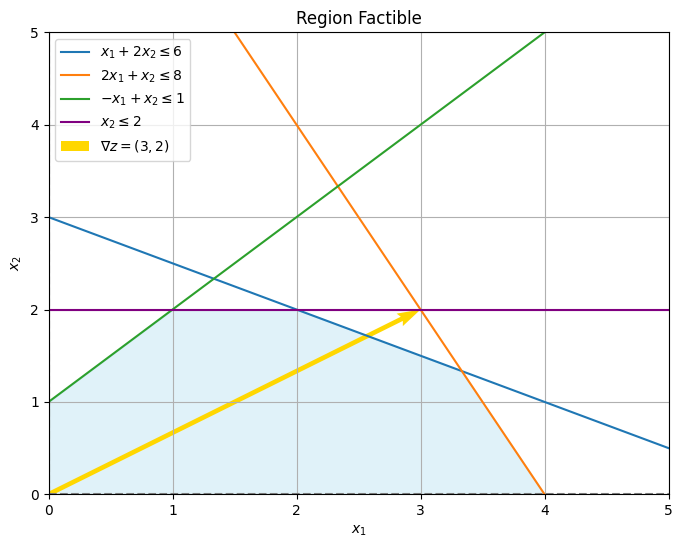

In [4]:
import matplotlib.pyplot as plt
import numpy as np

# Define the constraints
# x1 + 2x2 <= 6  => x2 <= (6 - x1)/2
# 2x1 + x2 <= 8  => x2 <= 8 - 2x1
# -x1 + x2 <= 1  => x2 <= 1 + x1
# x2 <= 2

x = np.linspace(0, 5, 400)
y1 = (6 - x) / 2
y2 = 8 - 2 * x
y3 = 1 + x
y4 = 2

# Plot the feasible region
plt.figure(figsize=(8, 6))
plt.plot(x, y1, label=r'$x_1 + 2x_2 \leq 6$')
plt.plot(x, y2, label=r'$2x_1 + x_2 \leq 8$')
plt.plot(x, y3, label=r'$-x_1 + x_2 \leq 1$')
plt.axhline(y=y4, color='purple', linestyle='-', label=r'$x_2 \leq 2$')
plt.axvline(x=0, color='gray', linestyle='--')
plt.axhline(y=0, color='gray', linestyle='--')

# Fill the feasible region
plt.fill_between(x, 0, np.minimum(np.minimum(np.minimum(y1, y2), y3), y4),
    where=(x>=0) & (np.minimum(np.minimum(np.minimum(y1, y2), y3), y4)>=0),
    color='skyblue', alpha=0.25)

# Add the gradient vector of the objective function (3, 2)
plt.quiver(0, 0, 3, 2, color='gold', scale=1, angles='xy', scale_units='xy', label=r'$\nabla z = (3, 2)$')


plt.xlim(0, 5)
plt.ylim(0, 5)
plt.xlabel(r'$x_1$')
plt.ylabel(r'$x_2$')
plt.title('Region Factible')
plt.legend()
plt.grid(True)
plt.show()

2. Resuelve el problema en forma estándar por el algortimo del simplex


3. Identifica en la representación gráfica el recorrido por los puntos extremos que hace el algoritmo del simplex.

4. Realiza el análisis de sensibilidad de los coeficientes de la función objetivo.

5. Realiza el análisis de sensibilidad de los términos independientes de las
restricciones.

6. ¿Cómo varía la solución óptima si se añade una nueva variable $x_3$ con coeficiente en la función objetivo $c_3 = 4$ y vector columna en las restricciones
$(1, 1, −1, −1)^t$?

7. Realiza el análisis de sensibilidad de los coeficientes de la función objetivo
y los términos independientes del nuevo problema con tres variables.

# 6. Dada la siguiente tabla del simplex en un problema de minimización:

v.b. | 1 | -2 | -1  | 1   | M   | 0   | 0 | $b_0$
-----|---|----|-----|-----|-----|-----|---|-------
x    | 1 |  0 | 2:3 | 1:3 | 1:3 |-1:3 | 0 | 2
y    | 0 | 1  | 1:3 | 2:3 | 2:3 | 1:3 | 0 | 7
$s^+_3$ | 3 | 0 | 0 | 4 | 1 | 0 | 0   | 1 | 6
__r__ | 0 | 0 | -1 | 2 | $M+1$  | 1   | 0 | 12

1. ¿La tabla dada corresponde a una solución óptima? Si no es así, continúa con las iteraciones hasta alcanzar una solución óptima?

2. Para la tabla óptima determinar la matriz $B^{−1}$ asociada con el punto extremo óptimo.

3. Determina cómo es la formulación matemática del problema lineal que se
está resolviendo con la tabla del simplex.

4. Realiza el análisis de sensibilidad de los coeficientes de la función objetivo.

5. Realiza el análisis de sensibilidad de los términos independientes de las
restricciones.

# 8.1) Resuelve por el algoritmo de escalado afín de paso largo los siguientes problemas lineales

$$
\begin{matrix}
max  & x_1 & + & 2x_2 & + & x_3\\
s.a. & 2x_1 & + & x_2 & + & x_3 & = 12\\
& x_1 & - & 2x_2 & + & 2x_3 & = 12\\
x_1,x_2, x_3 & ≥0 &  \\
 &  &  \\
\end{matrix}
$$
